In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from simulation_data.galaxies.galaxy import age_profile  
median_age, radius, r_e = age_profile(z=2, subhalo_id=1, n_bins=10) 

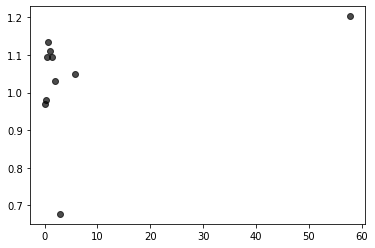

In [3]:
plt.plot(radius, median_age, 'o', c='black', alpha = 0.7)

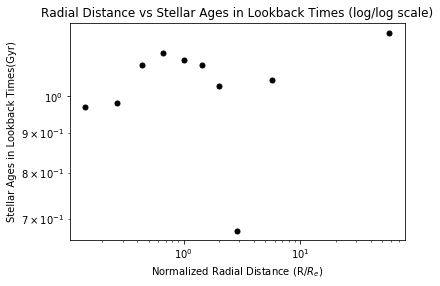

In [4]:
plt.title('Radial Distance vs Stellar Ages in Lookback Times (log/log scale)')
plt.xlabel('Normalized Radial Distance (R/$R_e$)')
plt.ylabel('Stellar Ages in Lookback Times(Gyr)')
plt.plot(radius, median_age, 'o', c='black', ms=5)
plt.xscale('log')
plt.yscale('log')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
#from astropy.constants import G, h, k_B

#imported requests
import requests
#import get()
from simulation_data import get

import scipy
from scipy import stats

h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [6]:
z = 2.0
subhalo_id = 1
n_bins = 10

In [7]:
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

import h5py
params = {'stars':'Coordinates,GFM_StellarFormationTime'}

url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(z) + "/subhalos/" + str(subhalo_id)
sub = get(url) # get json response of subhalo properties
saved_filename = get(url + "/cutout.hdf5",params) # get and save HDF5 cutout file

with h5py.File(saved_filename, mode='r') as f: #store as h5py file
    dx = f['PartType4']['Coordinates'][:,0] - sub['pos_x']
    dy = f['PartType4']['Coordinates'][:,1] - sub['pos_y']
    dz = f['PartType4']['Coordinates'][:,2] - sub['pos_z']
    starFormationTime = f['PartType4']['GFM_StellarFormationTime'][:]
#sub['pos_x'], sub['pos_y'], sub['pos_z'] already accounted for 
dx = dx[starFormationTime>0]
dy = dy[starFormationTime>0]
dz = dz[starFormationTime>0]
starFormationTime = starFormationTime[starFormationTime>0] #counts:56104

In [8]:
scale_factor = a = 1.0 / (1+z)
distance = (dx**2 + dy**2 + dz**2)**(1/2)
R = distance*a/h #units: physical kpc

In [9]:
#this takes the most time to run
z_starFormationTime = 1/starFormationTime -1
Gyr_starFormationTime = cosmo.age(z_starFormationTime).value
Gyr_redshift = cosmo.age(2.0).value
LookbackTime = Gyr_redshift - Gyr_starFormationTime #units: Gyr

In [10]:
radial_percentiles = np.zeros(n_bins + 1)#N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(R, (100/n_bins)*i)

In [11]:
from scipy import stats
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(R, LookbackTime, 'median', bins=radial_percentiles)

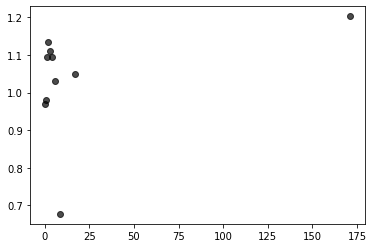

In [12]:
plt.plot(bin_edges[1:], statistic, 'ko', alpha = 0.7)

In [13]:
R_e = np.nanmedian(R)

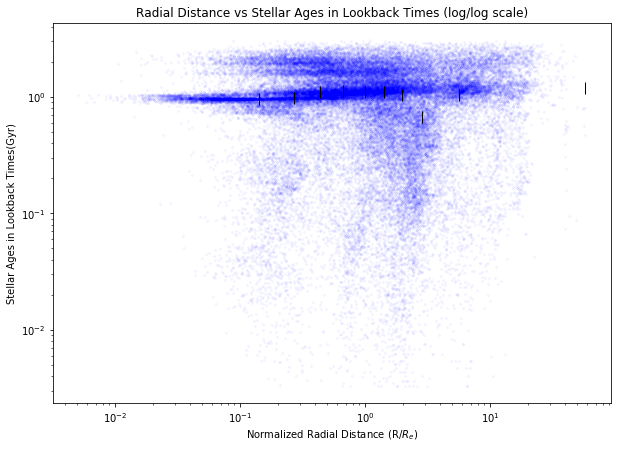

In [14]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(R/R_e, LookbackTime, 'bo', ms=2, alpha=0.03)
plt.plot(radial_percentiles[1:]/R_e, statistic, '|', c='black', ms=12)
plt.title('Radial Distance vs Stellar Ages in Lookback Times (log/log scale)')
plt.xlabel('Normalized Radial Distance (R/$R_e$)')
plt.ylabel('Stellar Ages in Lookback Times(Gyr)')
plt.xscale('log')
plt.yscale('log')